In [395]:
import numpy as np
import pandas as pd

In [396]:
data=pd.read_csv(r"C:\Users\Krishna\Desktop\Xtern\2025-VeloCityX-Expanded-Fan-Engagement-Data.csv")

# Cleaning and organising the data

### In this step, I focused on cleaning and organizing the dataset to make it suitable for further analysis. This involved handling missing values, correcting data types, and renaming columns for better clarity.

In [397]:
data.head()

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
0,U001,5,80,3,10,120,20
1,U002,8,60,1,8,100,35
2,U003,3,90,0,6,90,5
3,U004,7,70,2,15,140,40
4,U005,2,50,5,3,60,8


In [398]:
data.isnull().sum()

User ID                                    0
Fan Challenges Completed                   0
Predictive Accuracy (%)                    0
Virtual Merchandise Purchases              0
Sponsorship Interactions (Ad Clicks)       0
Time on Live 360 (mins)                    0
Real-Time Chat Activity (Messages Sent)    0
dtype: int64

In [399]:
duplicates = data.duplicated().sum()
duplicates

0

In [400]:
data.dtypes

User ID                                    object
Fan Challenges Completed                    int64
Predictive Accuracy (%)                     int64
Virtual Merchandise Purchases               int64
Sponsorship Interactions (Ad Clicks)        int64
Time on Live 360 (mins)                     int64
Real-Time Chat Activity (Messages Sent)     int64
dtype: object

In [401]:
data.shape

(100, 7)

In [402]:
data.rename(columns={
    'User ID': 'User_ID',
    'Fan Challenges Completed': 'Fan_Challenges_Completed',
    'Predictive Accuracy (%)': 'Predictive_Accuracy',
    'Virtual Merchandise Purchases': 'Virtual_Merchandise_Purchases',
    'Sponsorship Interactions (Ad Clicks)': 'Sponsorship_Interactions',
    'Time on Live 360 (mins)': 'Time_on_Live_360',
    'Real-Time Chat Activity (Messages Sent)': 'Real_Time_Chat_Activity'
}, inplace=True)

In [403]:
data.describe()

,Fan_Challenges_Completed,Predictive_Accuracy,Virtual_Merchandise_Purchases,Sponsorship_Interactions,Time_on_Live_360,Real_Time_Chat_Activity
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.790000,74.990000,2.670000,8.680000,129.350000,25.050000
std,2.825908,14.033506,2.064882,6.340315,38.634358,14.163101
min,1.000000,50.000000,0.000000,0.000000,60.000000,0.000000
25%,3.000000,62.000000,1.000000,2.000000,98.000000,11.000000
50%,6.000000,77.000000,2.000000,8.000000,124.500000,25.500000
75%,8.000000,86.500000,5.000000,15.000000,160.000000,35.000000
max,10.000000,98.000000,6.000000,19.000000,199.000000,49.000000


# Identifying trends

# Which users are most likely to purchase virtual merchandise?

In [404]:
numeric_data=data.select_dtypes(include=['number'])

In [405]:
corelation=numeric_data.corr()
corelation

,Fan_Challenges_Completed,Predictive_Accuracy,Virtual_Merchandise_Purchases,Sponsorship_Interactions,Time_on_Live_360,Real_Time_Chat_Activity
Fan_Challenges_Completed,1.000000,-0.105757,0.159378,-0.065239,0.002900,0.008089
Predictive_Accuracy,-0.105757,1.000000,0.022194,0.056612,0.125427,0.024295
Virtual_Merchandise_Purchases,0.159378,0.022194,1.000000,0.070550,-0.007527,-0.044676
Sponsorship_Interactions,-0.065239,0.056612,0.070550,1.000000,-0.073929,0.191292
Time_on_Live_360,0.002900,0.125427,-0.007527,-0.073929,1.000000,0.050714
Real_Time_Chat_Activity,0.008089,0.024295,-0.044676,0.191292,0.050714,1.000000


# Visualizing the corelation Matrix

In [406]:
import seaborn as sns
import matplotlib.pyplot as plt

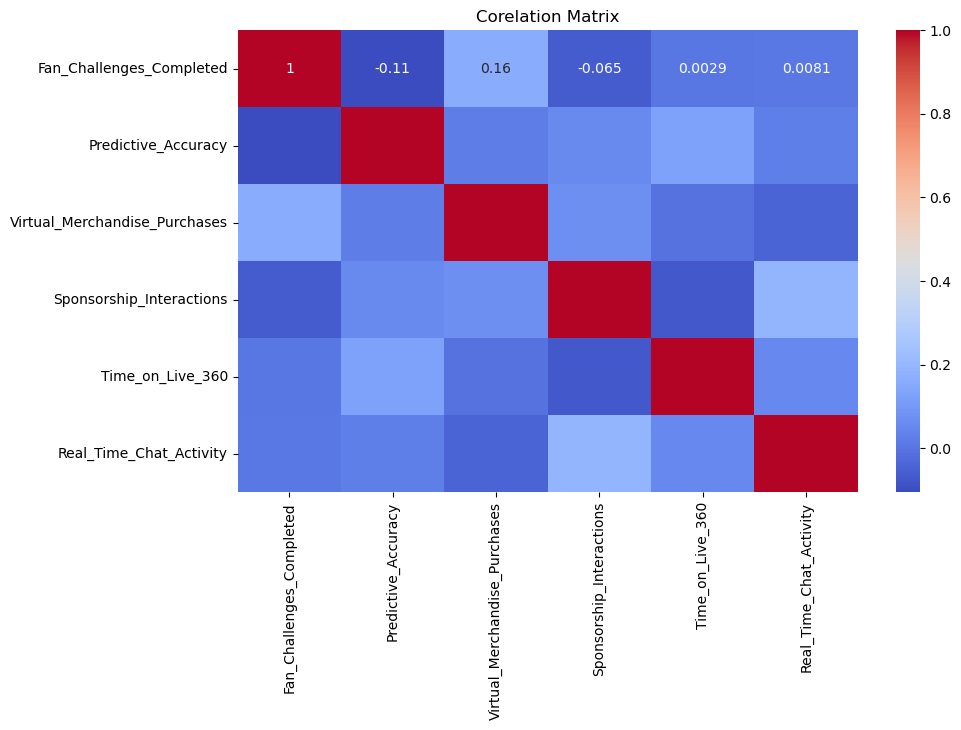

In [407]:
plt.figure(figsize=(10,6))
sns.heatmap(corelation,annot=True, cmap='coolwarm')
plt.title('Corelation Matrix')
plt.show()

#### The heatmap provides a visual representation of the correlation between various variables and virtual merchandise purchases. By analyzing this, we can identify which factors have the strongest relationships with purchasing behavior. For instance, if variables such as "Time on Live 360" or "Sponsorship Interactions" exhibit a strong positive correlation with virtual merchandise purchases, it suggests that users who are more engaged in these activities are significantly more likely to make purchases

# 2.2Analyze User Activities During Race Events

## How do user activities during race events correlate with their merchandise purchases and sponsorship interaction? 



This scatter plot directly explores how the time users spend on live coverage of race events correlates with their virtual merchandise purchases. It helps visualize whether more time spent on live coverage leads to more purchases.

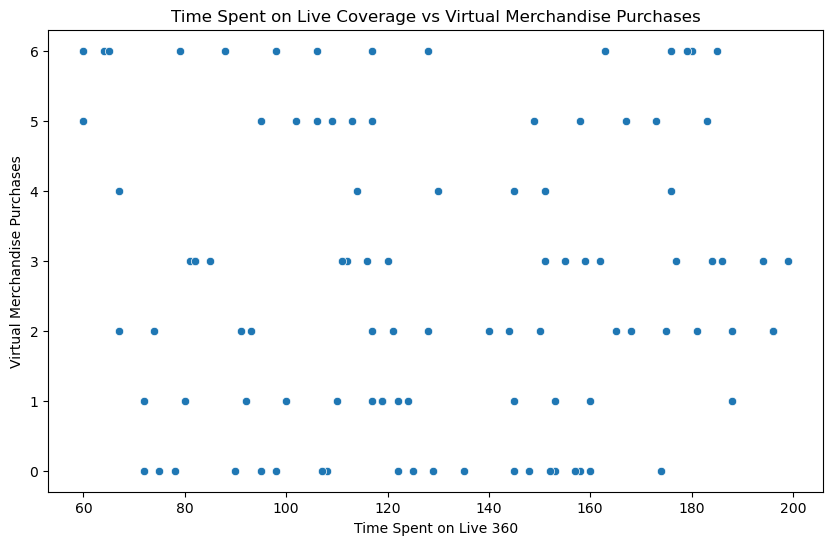

In [408]:
# Scatter plot: Time spent on live coverage vs Virtual Merchandise Purchases
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time_on_Live_360', y='Virtual_Merchandise_Purchases', data=data)
plt.title("Time Spent on Live Coverage vs Virtual Merchandise Purchases")
plt.xlabel("Time Spent on Live 360")
plt.ylabel("Virtual Merchandise Purchases")
plt.show()



**Insights:**

1.Trend Analysis: If there's a noticeable positive trend or clustering in the upper-right of the scatter plot, it would indicate that users who spend more time on live coverage are likely to make more virtual merchandise purchases.

2.Purchase Behavior: If the points are spread evenly without a clear trend, it suggests that time spent on live coverage may not be a significant factor in predicting virtual merchandise purchases.

# 2

This plot examines how much time spent on live race events correlates with users’ interactions with sponsors. It aims to answer whether users who spend more time watching live races are also more engaged with sponsors.

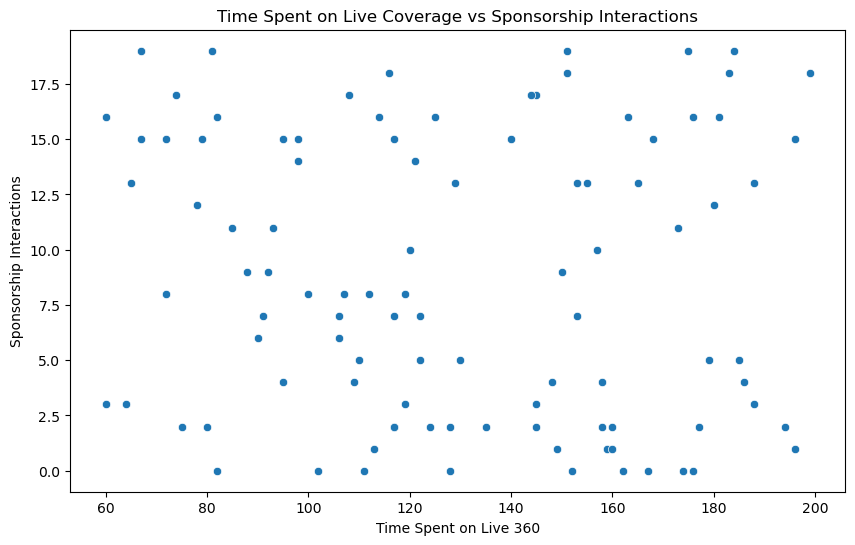

In [409]:
# Scatter plot: Time spent on live coverage vs Sponsorship Interactions
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time_on_Live_360', y='Sponsorship_Interactions', data=data)
plt.title("Time Spent on Live Coverage vs Sponsorship Interactions")
plt.xlabel("Time Spent on Live 360")
plt.ylabel("Sponsorship Interactions")
plt.show()

**Insights:**

Correlated Activity:
If you observe a positive correlation (an upward trend), it suggests that users who spend more time on live coverage are also more likely to interact with sponsorships. This would imply a level of engagement where users not only watch live events but also actively engage with sponsors.

Engagement Patterns:
If no strong trend is visible, it indicates that time spent on live coverage doesn’t necessarily translate into higher sponsorship interactions, and other factors may be influencing this behavior.

Target Audience: 
Understanding this correlation could help in targeting users who are both highly engaged in live coverage and interact more with sponsorships, making them potential customers for virtual merchandise or sponsors.

**A binary column is created to classify users into two categories: those who made a purchase (Yes) and those who did not (No). This allows for easier analysis of user behavior differences between those who purchased and those who didn’t.**

In [410]:
data['Purchased'] = data['Virtual_Merchandise_Purchases'].apply(lambda x: 'Yes' if x > 0 else 'No')


This boxplot compares how many fan challenges were completed by users who purchased merchandise (Yes) versus those who did not (No). The aim here is to investigate whether completing fan challenges influences the likelihood of making a virtual merchandise purchase.

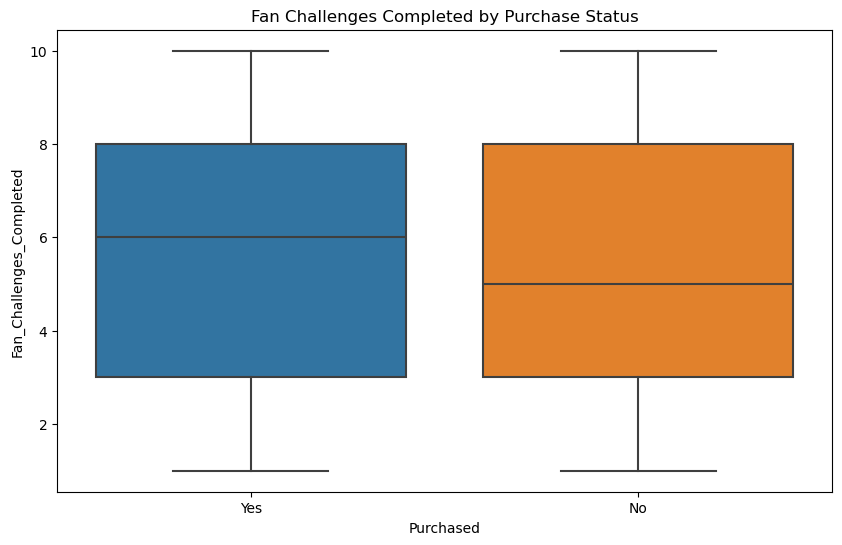

In [411]:
# Boxplot: Fan Challenges Completed by Purchase Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Purchased', y='Fan_Challenges_Completed', data=data)
plt.title("Fan Challenges Completed by Purchase Status")
plt.show()




**Insights:**

If users who purchased virtual merchandise completed significantly more fan challenges, this would indicate that completing fan challenges is a strong predictor of purchase behavior. This suggests that encouraging fan challenge participation could boost virtual merchandise sales.

This boxplot compares the level of sponsorship interaction between users who purchased virtual merchandise and those who didn’t. It investigates whether engaging with sponsors correlates with making purchases.

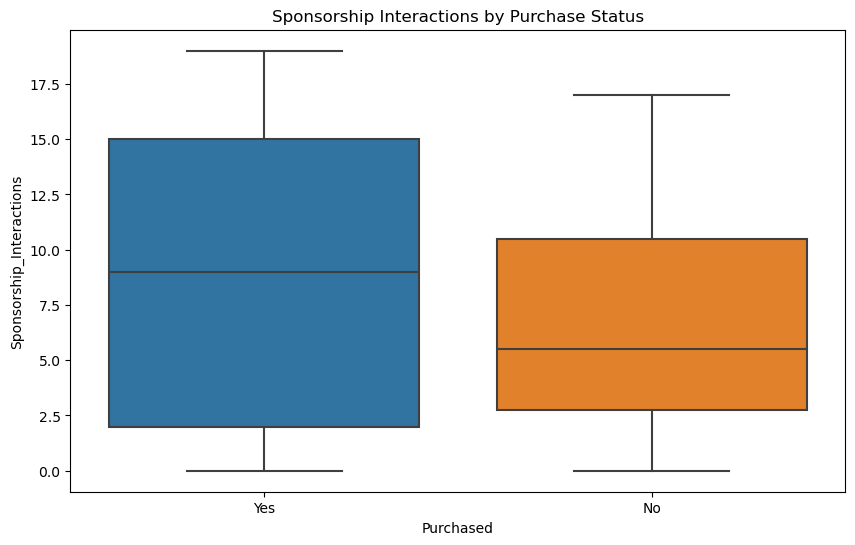

In [412]:
# Boxplot: Sponsorship Interactions by Purchase Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Purchased', y='Sponsorship_Interactions', data=data)
plt.title("Sponsorship Interactions by Purchase Status")
plt.show()

**Insights** 

If the boxplot shows higher sponsorship interaction among users who made purchases, it suggests that users who are more engaged with sponsors are also more likely to buy merchandise. This insight could guide decisions to target users who frequently engage with sponsors for merchandising offers.

# Clustering

In [413]:
from sklearn.preprocessing import StandardScaler

In [414]:
features = data[['Fan_Challenges_Completed', 'Predictive_Accuracy', 'Virtual_Merchandise_Purchases', 
               'Sponsorship_Interactions', 'Time_on_Live_360']]


**The features are normalized using StandardScaler, ensuring all features contribute equally to the distance calculations in clustering. Normalization adjusts the data to have a mean of 0 and a standard deviation of 1, which is crucial for clustering algorithms like K-Means that rely on distance measures.**

In [415]:
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

We use the elbow method to determine the optimal number of clusters. This method involves plotting the inertia (the sum of squared distances from each point to its assigned cluster center) against the number of clusters.

In [416]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(normalized_features)
    inertia.append(kmeans.inertia_)
    print(f"K={i}, WCSS={kmeans.inertia_}")

K=1, WCSS=500.0
K=2, WCSS=420.98075052631987
K=3, WCSS=369.2907629029387
K=4, WCSS=311.6947328596064
K=5, WCSS=277.1937703002834
K=6, WCSS=251.15043305536017
K=7, WCSS=228.50263184176464
K=8, WCSS=205.81933865468193
K=9, WCSS=181.1281368400492
K=10, WCSS=166.0691835867623


C:\Users\Krishna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Krishna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Krishna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Krishna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak o

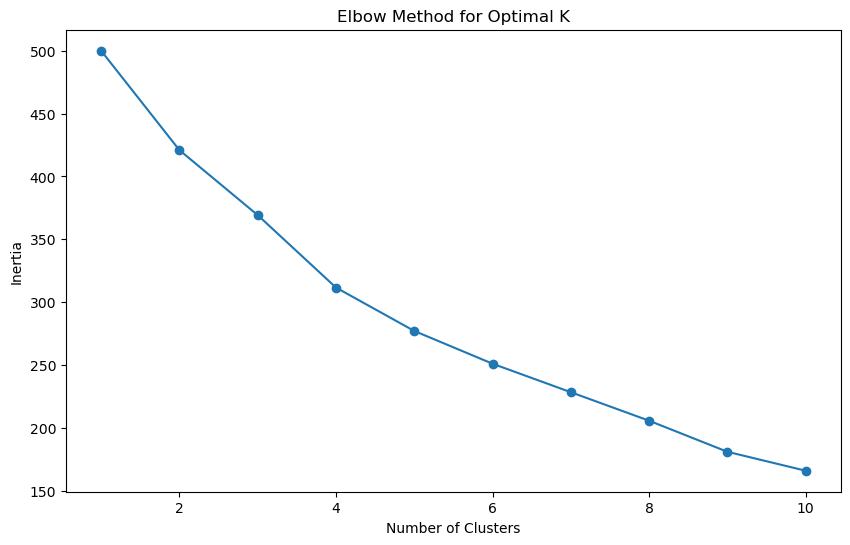

In [417]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

Based on the elbow plot, we determine the optimal number of clusters, which in this case we set as 3. This suggests that three distinct user segments exist in our data.

In [418]:
optimal_k = 3 # Example value, replace with actual optimal value from the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(normalized_features)

C:\Users\Krishna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [428]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(normalized_features, data['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.1440966064770848


The Silhouette Score is a metric used to evaluate the quality of a clustering algorithm. It measures how well data points are grouped within their clusters and how distinct those clusters are from each other. The score ranges between -1 and 1, and it is particularly useful for assessing how well the clusters are separated in space. In our case A score of 0.144  indicates moderate clustering, meaning some overlap between clusters but not entirely random.

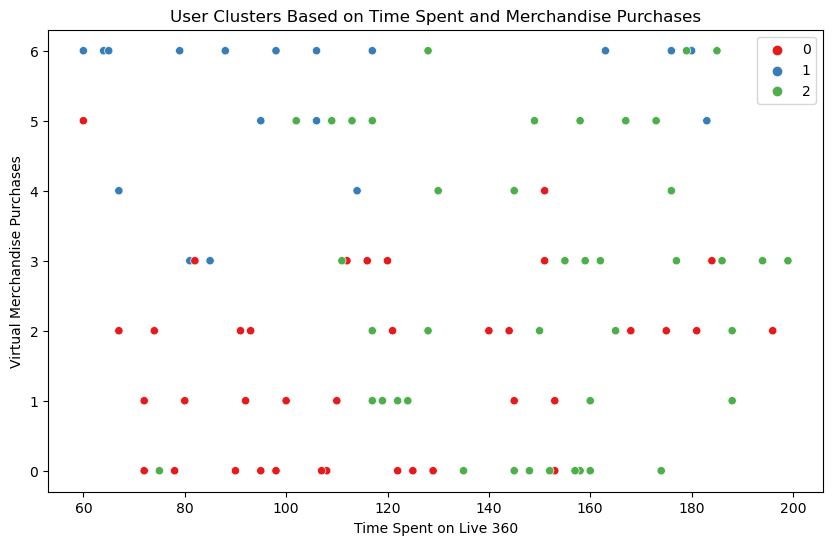

In [420]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time_on_Live_360', y='Virtual_Merchandise_Purchases', hue='Cluster', data=data, palette='Set1')
plt.title("User Clusters Based on Time Spent and Merchandise Purchases")
plt.xlabel("Time Spent on Live 360")
plt.ylabel("Virtual Merchandise Purchases")
plt.legend()
plt.show()


In [421]:
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers (scaled):", cluster_centers)


Cluster Centers (scaled): [[-0.50558633 -0.30271381 -0.56947287  0.55964292 -0.30210578]
 [ 0.46985482  0.23546083  1.26928094  0.70239951 -0.57996977]
 [ 0.24442941  0.16510977 -0.02743381 -0.77067323  0.49816989]]


In [422]:
# To interpret the centers more easily, convert them back to the original scale
cluster_centers_original = scaler.inverse_transform(cluster_centers)
print("Cluster Centers (original scale):", cluster_centers_original)


Cluster Centers (original scale): [[  4.36842105  70.76315789   1.5         12.21052632 117.73684211]
 [  7.11111111  78.27777778   5.27777778  13.11111111 107.05555556]
 [  6.47727273  77.29545455   2.61363636   3.81818182 148.5       ]]


# Interpretation of results

**Cluster 1: Highly Engaged Users**

Cluster 1 represents highly engaged users who actively participate in the VeloCityX app, completing an average of 7.11 fan challenges with a predictive accuracy of 78.28%. They demonstrate significant interest in the app by making an average of 5.28 virtual merchandise purchases and engaging in sponsorship interactions 13.11 times. Additionally, these users spend about 107.06 minutes on Live 360 coverage, indicating their deep commitment to both interactive and live content. Their strong performance and engagement levels make them valuable targets for marketing initiatives and exclusive offers.

**Cluster 0: Casual Users**

Cluster 0 comprises casual users who exhibit lower engagement with the app, completing an average of 4.37 fan challenges and achieving a predictive accuracy of 70.76%. They make minimal virtual merchandise purchases, averaging 1.5, and interact with sponsorship content about 12.21 times. Interestingly, these users spend a notable 117.74 minutes on Live 360 coverage, suggesting they enjoy the live content but lack motivation to participate actively in challenges or make purchases. Targeted incentives could help convert these users into more engaged participants.

**Cluster 2: Loyal Viewers**

Cluster 2 consists of loyal viewers who show a moderate level of engagement, completing an average of 6.48 fan challenges with a predictive accuracy of 77.30%. They tend to make 2.61 virtual merchandise purchases and exhibit limited sponsorship interactions, averaging only 3.82. Notably, these users spend the most time on Live 360 coverage, averaging 148.50 minutes, indicating a strong preference for consuming live content over participating in challenges. This group presents opportunities for marketing strategies that link challenges to live events, potentially enhancing their engagement further.

**Best cluster**

Cluster 1, identified as the "Highly Engaged Users," stands out as the best among the three clusters due to its exceptional engagement metrics. This cluster completes the most fan challenges, averaging 7.11, and achieves the highest predictive accuracy at 78.28%. Additionally, they exhibit the strongest interaction levels, making the most virtual merchandise purchases (5.28) and demonstrating a commendable rate of sponsorship interactions (13.11). While Cluster 2 showcases strong loyalty with an impressive time spent on Live 360 coverage (148.50 minutes), it falls short in interaction and engagement compared to Cluster 1, solidifying Cluster 1's position as the most valuable user segment.

In [423]:
# Step 8: Count the number of users in each cluster
print(data['Cluster'].value_counts())


Cluster
2    44
0    38
1    18
Name: count, dtype: int64


**Findings:** 

**1.Cluster Spread:**
The spread of colors (clusters) indicates that users in the same cluster do not cluster tightly together. This spread shows that there is significant variability in both time spent on live coverage and purchases within each cluster.

**2.Overlapping Points:**
The overlap between colors suggests that users within different clusters may share similar behaviors, leading to the conclusion that user engagement and purchasing decisions are influenced by a combination of factors rather than fitting neatly into one profile.

**Insights:**

**1.Complex User Engagement:**

The wide spread of points in the clusters indicates that user engagement with virtual merchandise is not strictly defined by the amount of time spent on live coverage. Users with similar time spent can have drastically different purchasing behaviors.

**2.Segmentation Strategy:**

The presence of diverse user behaviors suggests that a more nuanced approach to segmentation is needed. Instead of treating users in the same cluster as homogeneous, marketing strategies could be refined to address the different needs and preferences within each cluster.

**3.Potential for Targeted Interventions:**

Understanding the characteristics of each cluster can help in designing targeted interventions. For instance, if one cluster tends to spend more time on live coverage but makes fewer purchases, strategies could be developed to encourage purchases through targeted promotions or exclusive offers.

# Predictive modelling

In [424]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score


def random_forest_prediction(data):
    
    data['Merchandise_Purchase'] = np.where(data['Virtual_Merchandise_Purchases'] > 0, 1, 0)

    
    X = data[['Fan_Challenges_Completed', 'Predictive_Accuracy', 
               'Sponsorship_Interactions', 'Time_on_Live_360']]
    y = data['Merchandise_Purchase']

    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    model = RandomForestRegressor(n_estimators=20, n_jobs=35, random_state=42)
    model.fit(X_train, y_train)

    
    y_pred = model.predict(X_test)

    
    predicted_classes = np.where(y_pred > 0.5, 1, 0)

    
    accuracy = accuracy_score(y_test, predicted_classes)
    
    
    print(f'Accuracy Score: {accuracy:.2f}')


random_forest_prediction(data)


Accuracy Score: 0.70


An accuracy score of 0.70 indicates that the Random Forest model correctly predicts virtual merchandise purchases 70% of the time on the test set. This level of accuracy suggests that the model can effectively identify users likely to make purchases, providing valuable insights for targeted marketing strategies. A score above 0.70 is generally considered acceptable and implies a solid foundation for understanding user behaviors regarding virtual merchandise purchases. Overall, the accuracy score of 0.70 demonstrates the model's potential to meet business objectives.

# Interpretation of results

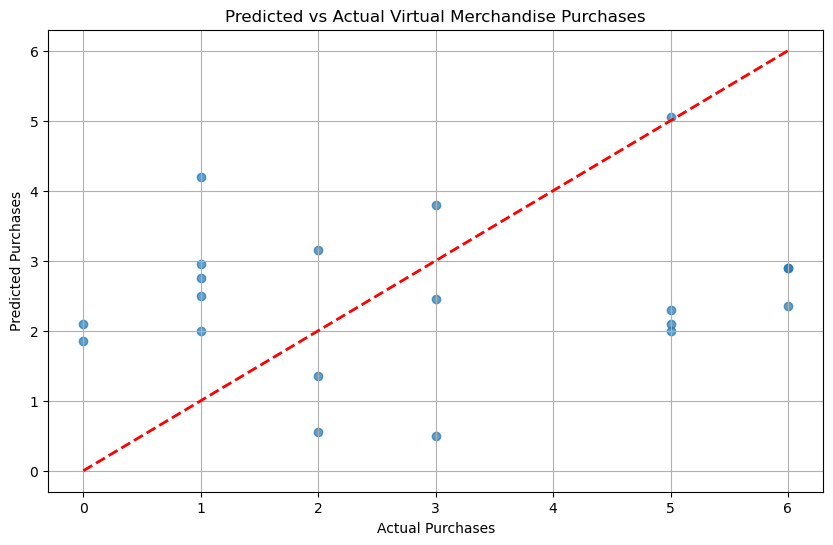

In [425]:
# Scatter plot of Predicted vs Actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, linestyle='--')  # Line for perfect prediction
plt.title("Predicted vs Actual Virtual Merchandise Purchases")
plt.xlabel("Actual Purchases")
plt.ylabel("Predicted Purchases")
plt.grid()
plt.show()


**Findings from the scatterplot**

The scatter plot titled "Predicted vs Actual Virtual Merchandise Purchases" provides a visual representation of the relationship between the actual purchases and the predictions made by the model.

**Axes:**

The x-axis represents the actual virtual merchandise purchases, which are the true values observed in the test dataset.
The y-axis indicates the predicted virtual merchandise purchases, which are the values predicted by the model based on the input features.

the red dashed line in the plot rpresents the line of perfect prediction. This line indicates where the predicted values would equal the actual values (i.e., if a point lies on this line, it means the model made an accurate prediction for that observation).

Mathematically, this line is described by the equation y=x. Any point on this line signifies that the model's prediction matches the actual number of purchases.

**points**

Each point on the scatter plot corresponds to an observation from the test dataset. The horizontal position (x-coordinate) of each point reflects the actual number of virtual merchandise purchases, while the vertical position (y-coordinate) shows the predicted number.

Ideally, for a model that performs well, the points would cluster closely around the red dashed line, indicating that the predictions are accurate for most observations.


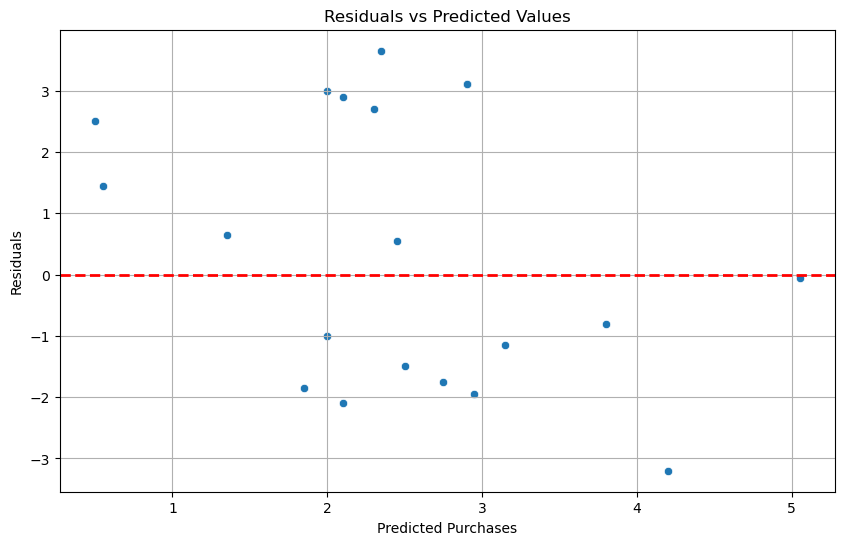

In [426]:
# Calculate residuals
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--', linewidth=2)  # Line for zero residual
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Purchases")
plt.ylabel("Residuals")
plt.grid()
plt.show() 

The residual plot provides valuable insights into the performance of the Random Forest model used to predict virtual merchandise purchases. Here's an interpretation of the plot:

Understanding Residuals: 

The residuals are calculated as the difference between the actual values (y_test) and the predicted values (y_pred). They represent the errors in the model's predictions. Ideally, the residuals should be randomly scattered around the horizontal line at zero, indicating that the model's predictions are unbiased.

Distribution of Residuals:
If the residuals are evenly distributed around the zero line, it suggests that the model has captured the underlying pattern in the data well. However, if there are noticeable patterns, such as clusters of points or a funnel shape, it may indicate that the model is not adequately capturing some aspects of the data.

C:\Users\Krishna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


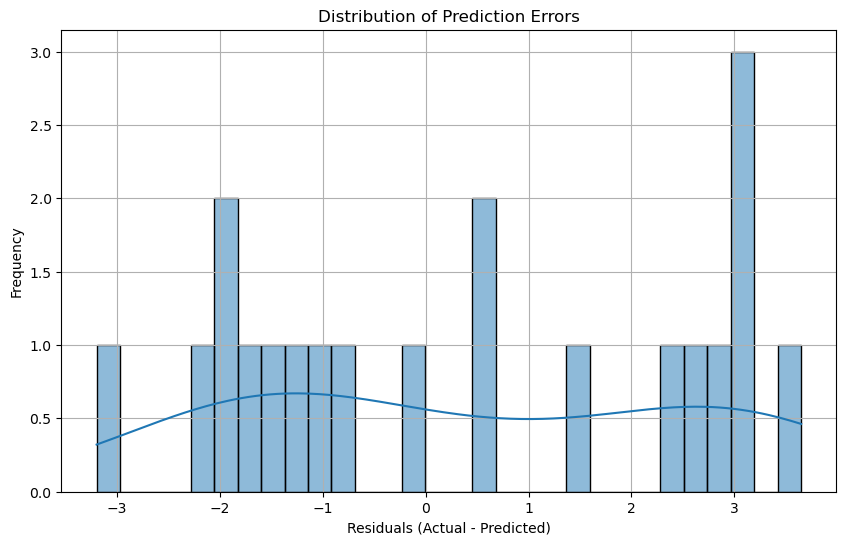

In [427]:
# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid()
plt.show() 

The histogram of residuals provides a visual representation of the distribution of prediction errors made by the Random Forest model when predicting virtual merchandise purchases. The x-axis represents the residuals, calculated as the difference between the actual values and the predicted values, while the y-axis indicates the frequency of these residuals within specific bins.

# Proposed Fan Challenge: Race Winner Prediction

**Overview:**

The Race Winner Prediction challenge allows users to engage with the app actively by predicting the winner of each upcoming race. This challenge is designed to leverage user enthusiasm around races and enhance interaction within the VeloCityX app.

How It Works:

Prediction Mechanism:
Users can submit their predictions for race winners before each event. They will have access to statistics, historical data, and other relevant information to inform their choices.
Scoring System:
Points for Accuracy: Users earn points based on how accurate their predictions are. For example:
Correct prediction of the winner: 10 points
Correct prediction of the top 3 finishers: 5 points
Correct prediction of the top 5 finishers: 2 points

Bonus Points: Additional points could be awarded for predicting upsets (e.g., a lesser-ranked racer winning) or for providing insight into their predictions (e.g., commenting on race strategies).


**Engagement Potential:**

Active Participation: This challenge is likely to encourage users to stay engaged with the app leading up to races. The anticipation of the event and the results will keep users returning to the app to see how their predictions panned out.
Community Interaction: Users can share their predictions, discuss strategies, and analyze past performances within the app's community features, creating a lively environment around the races.

**Monetization Strategy:**

Exclusive Rewards: Offer virtual merchandise (e.g., unique avatars, custom race gear) as rewards for top predictors or for completing a certain number of predictions. This not only enhances user engagement but also drives merchandise sales.
Discounts and Promotions: Users who actively participate could receive discounts on merchandise or exclusive offers, incentivizing them to purchase while also enhancing their overall experience within the app.
Sponsorships and Partnerships: Collaborate with sponsors to provide additional rewards for users who participate, thereby creating a mutually beneficial relationship that can increase visibility for both the app and the sponsors.

**Expected Outcomes:**

Increased User Engagement:
By tapping into users' competitive spirits, the challenge aims to foster a vibrant community of participants who are more likely to use the app regularly.
Boosted Merchandise Sales:
The combination of rewards and discounts will likely increase purchases of virtual merchandise, driving revenue for the app.
Enhanced User Experience: Providing users with opportunities to engage in a meaningful way with the races and with each other will improve their overall satisfaction and loyalty to the app.
